# 🚀 Incident Management ML Project

https://archive.ics.uci.edu/dataset/498/incident+management+process+enriched+event+log

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load Dataset (Replace with actual path if local file)
file_path = "/content/drive/MyDrive/ML/incident_event_log.csv"  # <- Replace with your file name
df = pd.read_csv(file_path,header=0)

# 📌 Display Dataset Shape
print("Dataset Shape:", df.shape)

# 🧾 Display First 5 Rows
print("\nSample Data:")
df.head()


Dataset Shape: (141712, 36)

Sample Data:


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [60]:
# 🔢 Column-wise Data Types
print("\nColumn Types:")
print(df.dtypes)


Column Types:
number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object

In [61]:
# 📊 Unique Values per Column (Good for EDA planning)
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
number                     24918
incident_state                 9
active                         2
reassignment_count            28
reopen_count                   9
sys_mod_count                115
made_sla                       2
caller_id                   5245
opened_by                    208
opened_at                  19849
sys_created_by               186
sys_created_at             11553
sys_updated_by               846
sys_updated_at             50664
contact_type                   5
location                     225
category                      59
subcategory                  255
u_symptom                    526
cmdb_ci                       51
impact                         3
urgency                        3
priority                       4
assignment_group              79
assigned_to                  235
knowledge                      2
u_priority_confirmation        2
notify                         2
problem_id                   253
rfc             

In [62]:
# 🧪 Descriptive Stats for Numeric Columns
print("\nSummary Statistics (Numerical):")
df.describe()



Summary Statistics (Numerical):


,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [63]:
# 🧠 Descriptive Stats for Object Columns
print("\nSummary Statistics (Categorical):")
df.describe(include=['object'])


Summary Statistics (Categorical):


,number,incident_state,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,...,assigned_to,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
count,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,...,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712
unique,24918,9,5245,208,19849,186,11553,846,50664,5,...,235,2,253,182,5,4,18,217,18506,2707
top,INC0019396,Active,Caller 1904,Opened by 17,14/4/2016 20:42,?,?,Updated by 908,24/3/2016 18:40,Phone,...,?,Do Not Notify,?,?,?,?,code 6,Resolved by 15,?,24/3/2016 18:59
freq,58,38716,1425,41466,58,53076,53076,36162,420,140462,...,27496,141593,139417,140721,141468,141689,86583,15421,3141,3324


In [64]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

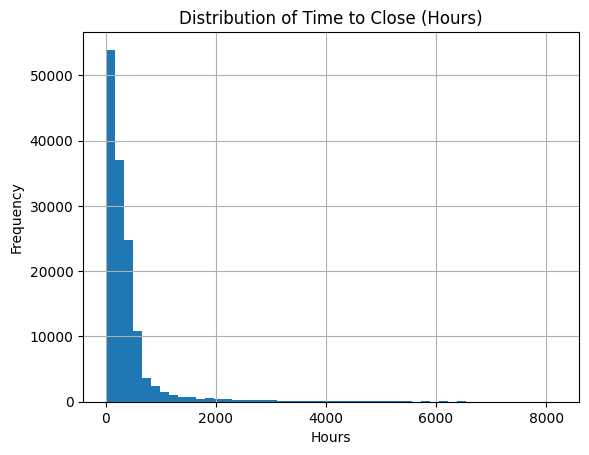

In [65]:
# Convert Time Columns to Datetime
time_cols = ['opened_at', 'closed_at', 'resolved_at', 'sys_created_at', 'sys_updated_at']
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col],format="%d/%m/%Y %H:%M",errors='coerce')

# Calculate Time to Resolve / Close
if 'closed_at' in df.columns and 'opened_at' in df.columns:
    df['time_to_close_hours'] = (df['closed_at'] - df['opened_at']).dt.total_seconds() / 3600

if 'resolved_at' in df.columns and 'opened_at' in df.columns:
    df['time_to_resolve_hours'] = (df['resolved_at'] - df['opened_at']).dt.total_seconds() / 3600

# Histogram for Close Tim
if 'time_to_close_hours' in df.columns:
    df['time_to_close_hours'].dropna().hist(bins=50)
    plt.title("Distribution of Time to Close (Hours)")
    plt.xlabel("Hours")
    plt.ylabel("Frequency")
    plt.show()

# Target : time_to_close_hours


In [66]:
# Total number of rows
total_rows = len(df)

# Count of null (NaN) values
nan_counts = df.isnull().sum()

# Count of '?' values
question_mark_counts = df.apply(lambda col: (col.astype(str).str.strip() == '?').sum())

# Total missing count (NaN + '?')
total_missing = nan_counts + question_mark_counts

# Missing percentage
missing_percent = (total_missing / total_rows) * 100

# Final summary DataFrame
missing_summary = pd.DataFrame({
    "Missing Count": total_missing,
    "Missing %": missing_percent.round(2)
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary["Missing Count"] > 0].sort_values(by="Missing %", ascending=False)

# Show result
print("🔍 Combined Missing Values Summary (NaN + '?'):\n")
print(missing_summary)


🔍 Combined Missing Values Summary (NaN + '?'):

                       Missing Count  Missing %
caused_by                     141689      99.98
vendor                        141468      99.83
cmdb_ci                       141267      99.69
rfc                           140721      99.30
problem_id                    139417      98.38
sys_created_by                 53076      37.45
sys_created_at                 53076      37.45
u_symptom                      32964      23.26
assigned_to                    27496      19.40
assignment_group               14213      10.03
opened_by                       4835       3.41
resolved_at                     3141       2.22
time_to_resolve_hours           3141       2.22
closed_code                      714       0.50
resolved_by                      226       0.16
subcategory                      111       0.08
category                          78       0.06
location                          76       0.05
caller_id                         29    

In [67]:
# 📌 Step 1: Identify columns with >10% missing
cols_to_drop = missing_summary[missing_summary["Missing %"] > 10].index.tolist()

# ✅ Step 2: Drop them from the dataset
df_cleaned = df.drop(columns=cols_to_drop)

# 🧾 Step 3: Output the result
print(f"🧹 Dropped columns with >10% missing values: {cols_to_drop}")
print(f"✅ Cleaned dataset shape: {df_cleaned.shape}")

🧹 Dropped columns with >10% missing values: ['caused_by', 'vendor', 'cmdb_ci', 'rfc', 'problem_id', 'sys_created_by', 'sys_created_at', 'u_symptom', 'assigned_to', 'assignment_group']
✅ Cleaned dataset shape: (141712, 28)


## Split the Data in traning and Test

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# ✂️ Split into training and testing sets (80/20 split)
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# ✅ Output the shapes
print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Train set shape: (113369, 28)
Test set shape: (28343, 28)


In [70]:
# 🔍 Detect column types
analytics_types = {}
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        analytics_types[col] = 'Numerical'
    elif train_df[col].dtype == 'bool':
        analytics_types[col] = 'Binary'
    elif train_df[col].nunique() <= 10:
        analytics_types[col] = 'Categorical'
    else:
        analytics_types[col] = 'Nominal'

# 🧠 Separate by type
numerical_cols = [col for col, typ in analytics_types.items() if typ == 'Numerical']
binary_cols = [col for col, typ in analytics_types.items() if typ == 'Binary']
categorical_cols = [col for col, typ in analytics_types.items() if typ == 'Categorical']
nominal_cols = [col for col, typ in analytics_types.items() if typ == 'Nominal']

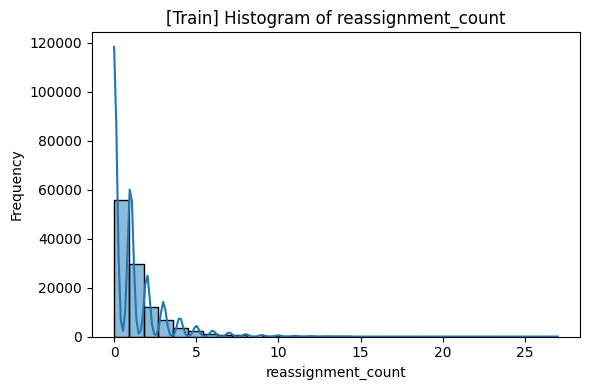

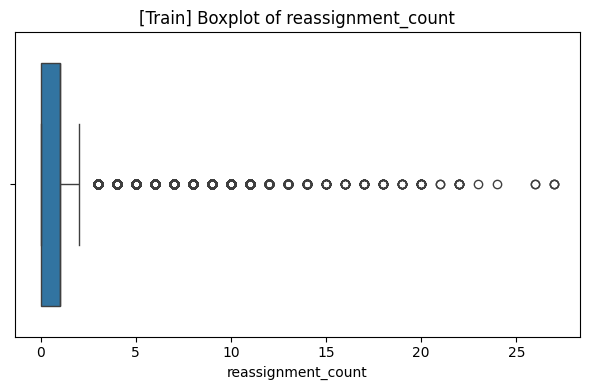

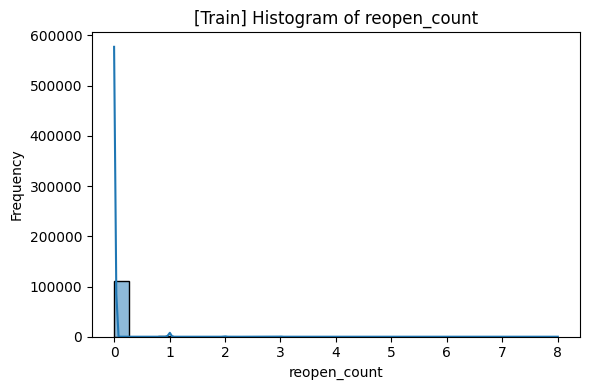

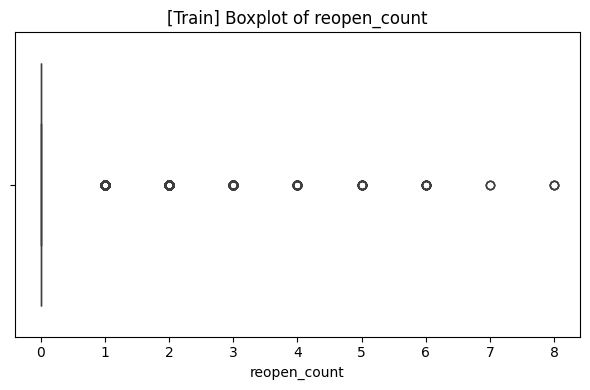

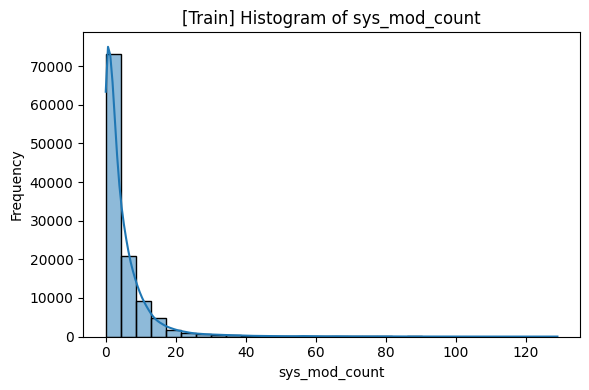

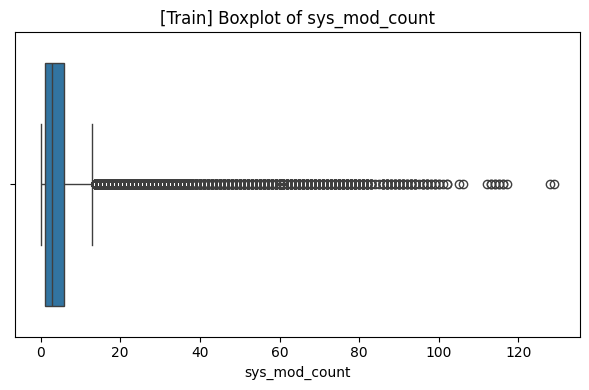

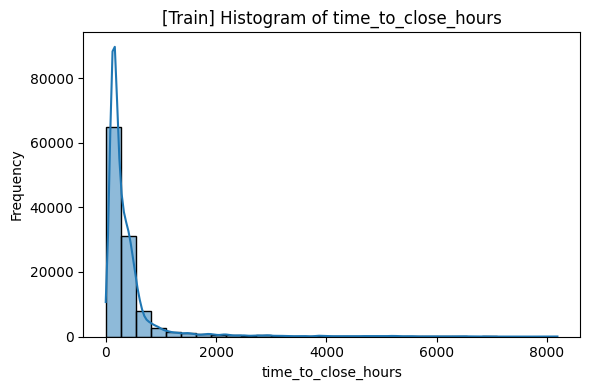

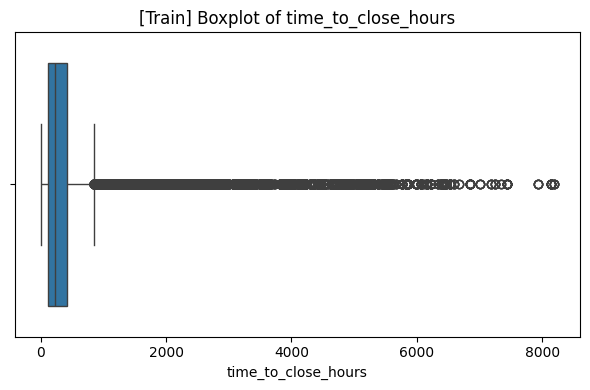

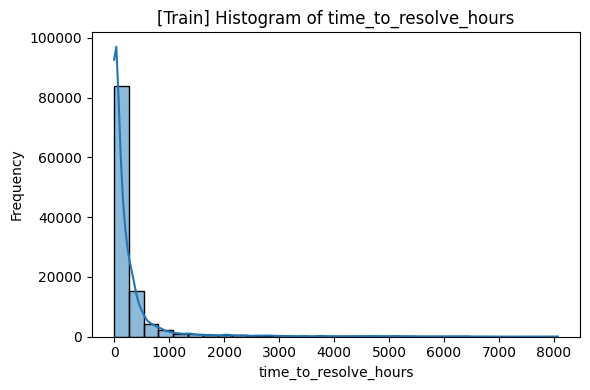

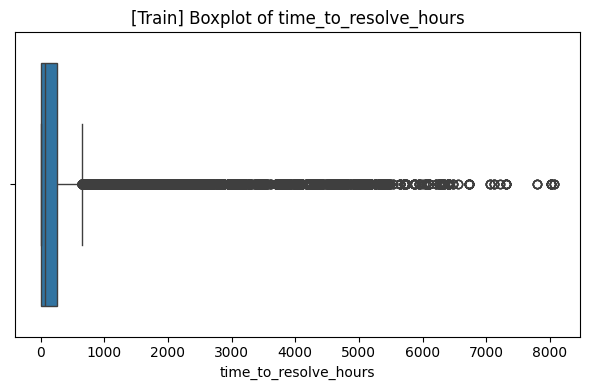

In [19]:
# 📊 Numerical Features: Histogram & Boxplot
for col in numerical_cols:
    if train_df[col].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.histplot(train_df[col].dropna(), kde=True, bins=30)
        plt.title(f"[Train] Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=train_df[col].dropna())
        plt.title(f"[Train] Boxplot of {col}")
        plt.tight_layout()
        plt.show()

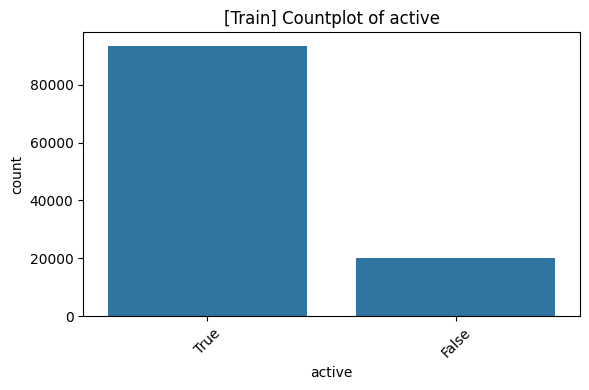

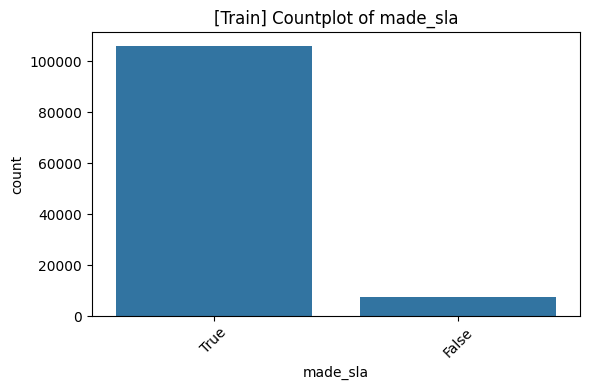

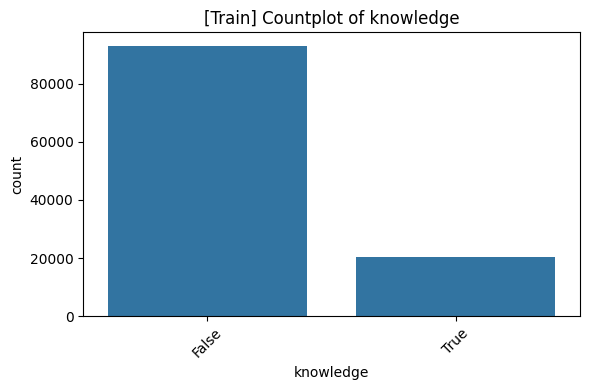

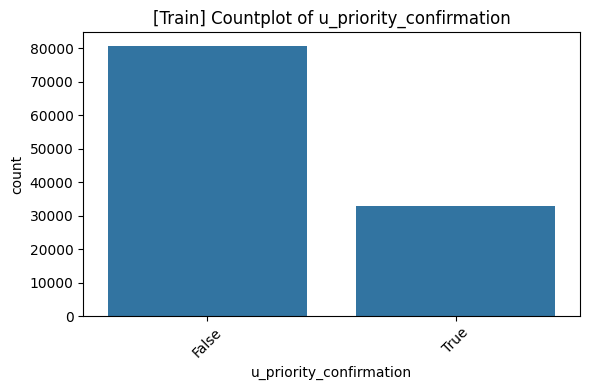

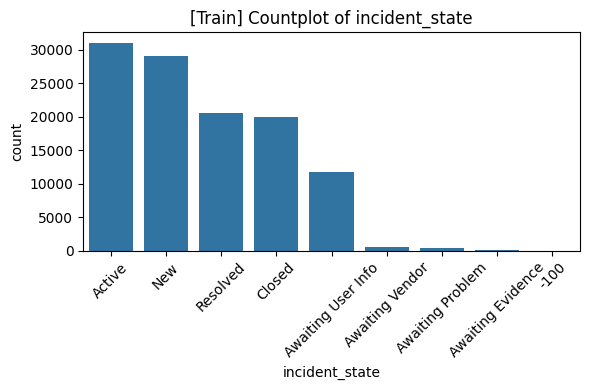

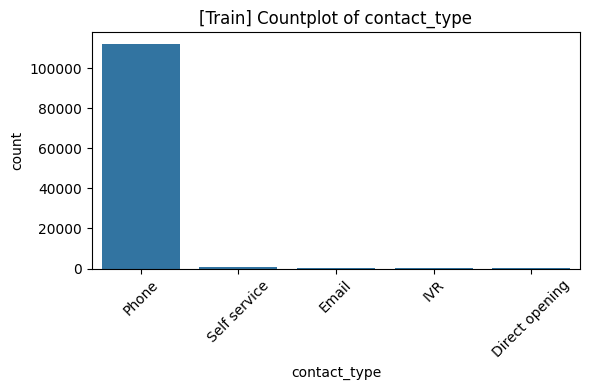

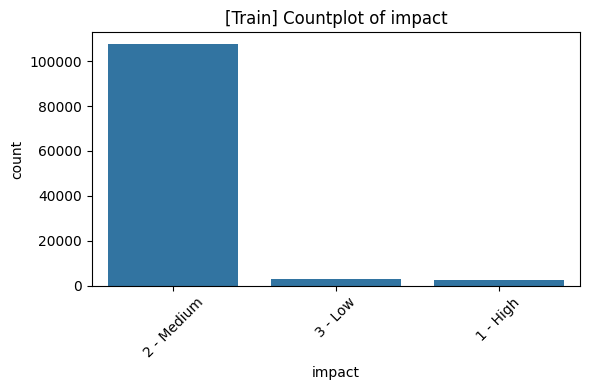

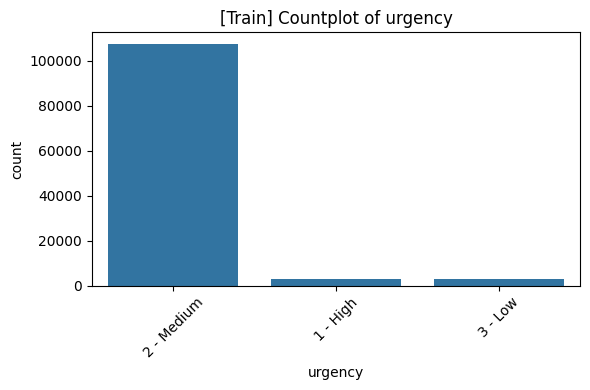

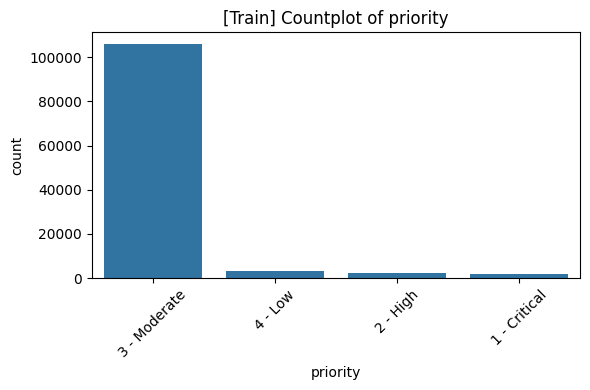

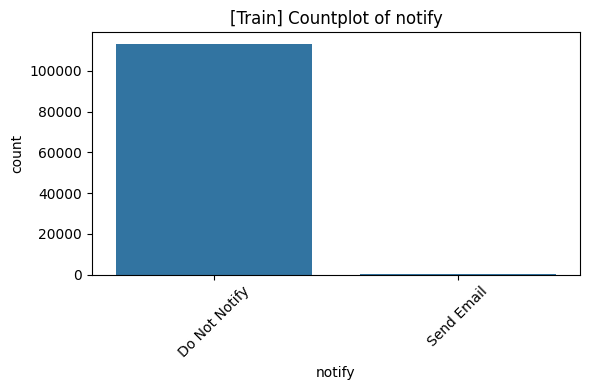

In [20]:
# 📊 Binary & Categorical: Countplot
for col in binary_cols + categorical_cols:
    if train_df[col].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
        plt.title(f"[Train] Countplot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

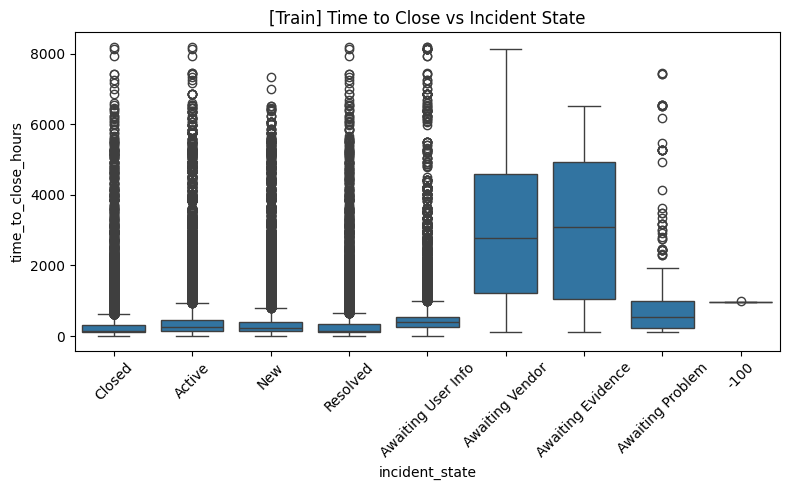

In [21]:
# 🔁 Combination: Boxplot (Numerical vs Categorical)
if 'time_to_close_hours' in train_df.columns and 'incident_state' in train_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x='incident_state', y='time_to_close_hours')
    plt.title("[Train] Time to Close vs Incident State")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

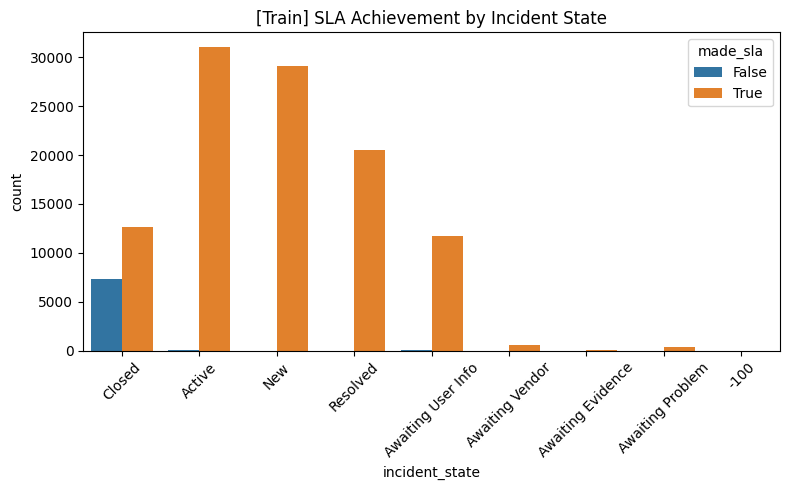

In [22]:
# Combination
if 'made_sla' in train_df.columns and 'incident_state' in train_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x='incident_state', hue='made_sla')
    plt.title("[Train] SLA Achievement by Incident State")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

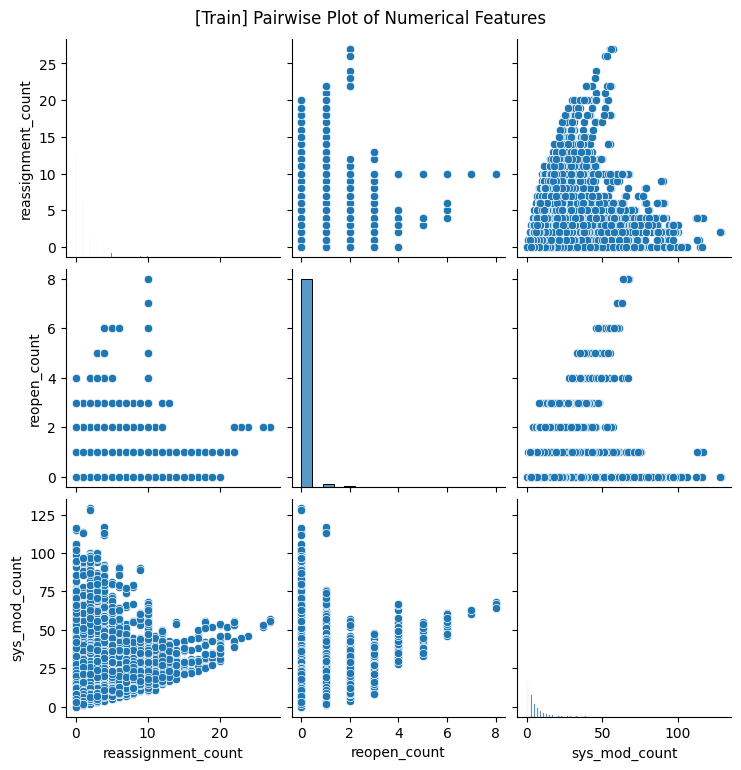

In [23]:
# 🔁 Pairplot (only if all columns exist)
pair_cols = ['reassignment_count', 'reopen_count', 'sys_mod_count']
if all(col in train_df.columns for col in pair_cols):
    sns.pairplot(train_df[pair_cols].dropna())
    plt.suptitle("[Train] Pairwise Plot of Numerical Features", y=1.02)
    plt.show()

In [24]:
import scipy.stats as stats
from itertools import combinations

In [25]:
df_analysis = train_df.copy()
# Detect column types
categorical_cols = df_analysis.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df_analysis.select_dtypes(include=['int64', 'float64']).columns.tolist()

<ipython-input-26-8e34795e4f10>:9: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


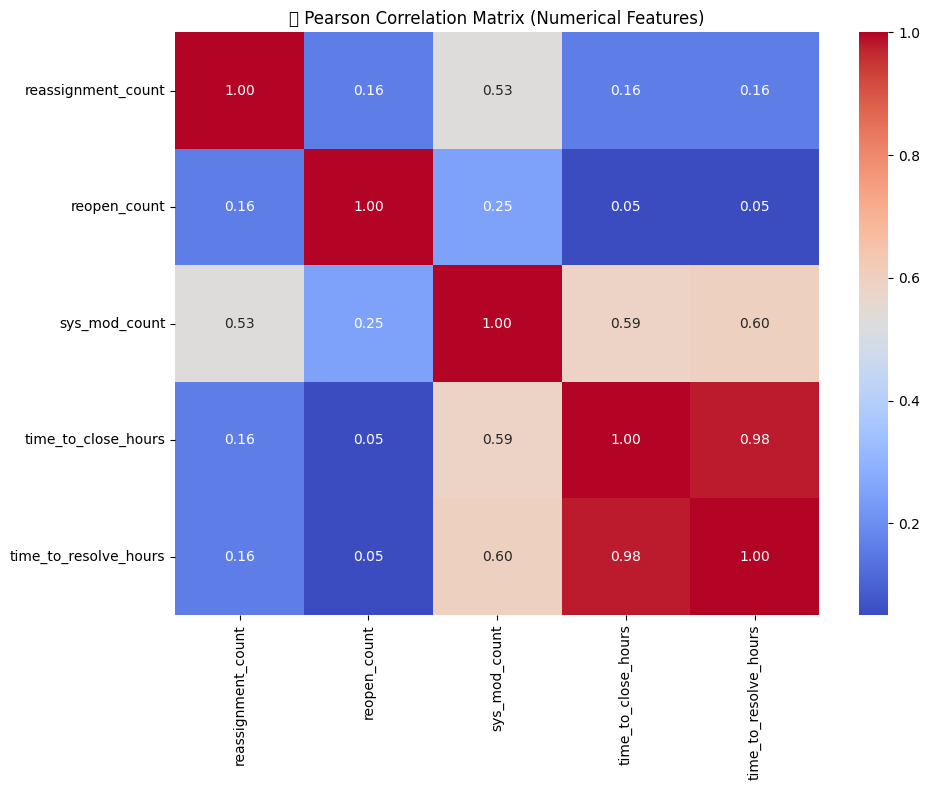

In [26]:
# ----------------------------------
# 1 Pearson Correlation (Numerical)
# ----------------------------------
pearson_corr = df_analysis[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📌 Pearson Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()


### 🔍 Chi-Square Test (Categorical vs Categorical)

This code performs the **Chi-Square Test of Independence** on all unique pairs of **categorical columns** in the dataset to identify statistically significant associations.

- Skips columns with only one unique value.
- Creates a contingency table for each pair using `pd.crosstab`.
- Applies `stats.chi2_contingency()` to compute the chi-square statistic and p-value.
- Appends results (feature names, chi2 stat, p-value) to a list.
- Converts the list to a DataFrame (`chi_df`).
- Filters for significant results where `p-value < 0.05` into `significant_chi`.

Use this to find pairs of categorical features that are likely dependent.


In [27]:
# ----------------------------------
# 2. Chi-Square Test (Categorical vs Categorical)
# ----------------------------------
chi_square_results = []
for col1, col2 in combinations(categorical_cols, 2):
    if df_analysis[col1].nunique() > 1 and df_analysis[col2].nunique() > 1:
        table = pd.crosstab(df_analysis[col1], df_analysis[col2])
        if table.shape[0] > 1 and table.shape[1] > 1:
            chi2, p, _, _ = stats.chi2_contingency(table)
            chi_square_results.append({
                "Feature 1": col1,
                "Feature 2": col2,
                "Chi2 Stat": chi2,
                "p-value": p
            })

chi_df = pd.DataFrame(chi_square_results)
significant_chi = chi_df[chi_df["p-value"] < 0.05]
chi_df

,Feature 1,Feature 2,Chi2 Stat,p-value
0,number,incident_state,2.531433e+05,0.000000e+00
1,number,active,1.572211e+04,1.000000e+00
2,number,made_sla,1.771631e+04,1.000000e+00
3,number,caller_id,5.938053e+08,0.000000e+00
4,number,opened_by,2.346738e+07,0.000000e+00
...,...,...,...,...
166,u_priority_confirmation,closed_code,3.332607e+02,1.476342e-60
167,u_priority_confirmation,resolved_by,4.757914e+03,0.000000e+00
168,notify,closed_code,3.601168e+04,0.000000e+00
169,notify,resolved_by,8.166624e+04,0.000000e+00


### 🔥 Cramér’s V (Strength of Association for Categorical Features)

This code calculates **Cramér’s V** for all pairs of **categorical columns** to measure the **strength of association** between them.

- **`cramers_v(x, y)`**:  
  Custom function that:
  - Builds a contingency table with `pd.crosstab`
  - Performs Chi-Square test
  - Calculates Cramér’s V using the formula:  
    V = \sqrt{\frac{\chi^2 / n}{\min(k-1, r-1)}}
    \]
  - Returns NaN if the table is too small (1 row/column)

- Loops through each pair in `categorical_cols` to fill the `cramer_matrix`.

- Converts all values to float and stores results in a symmetric matrix.

- **Optional**: Displays a heatmap to visualize the strength of association between features using `sns.heatmap`.

> Use this to **identify strong or weak associations** (not just significance) between categorical variables.


<ipython-input-28-9c0a317799bd>:27: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


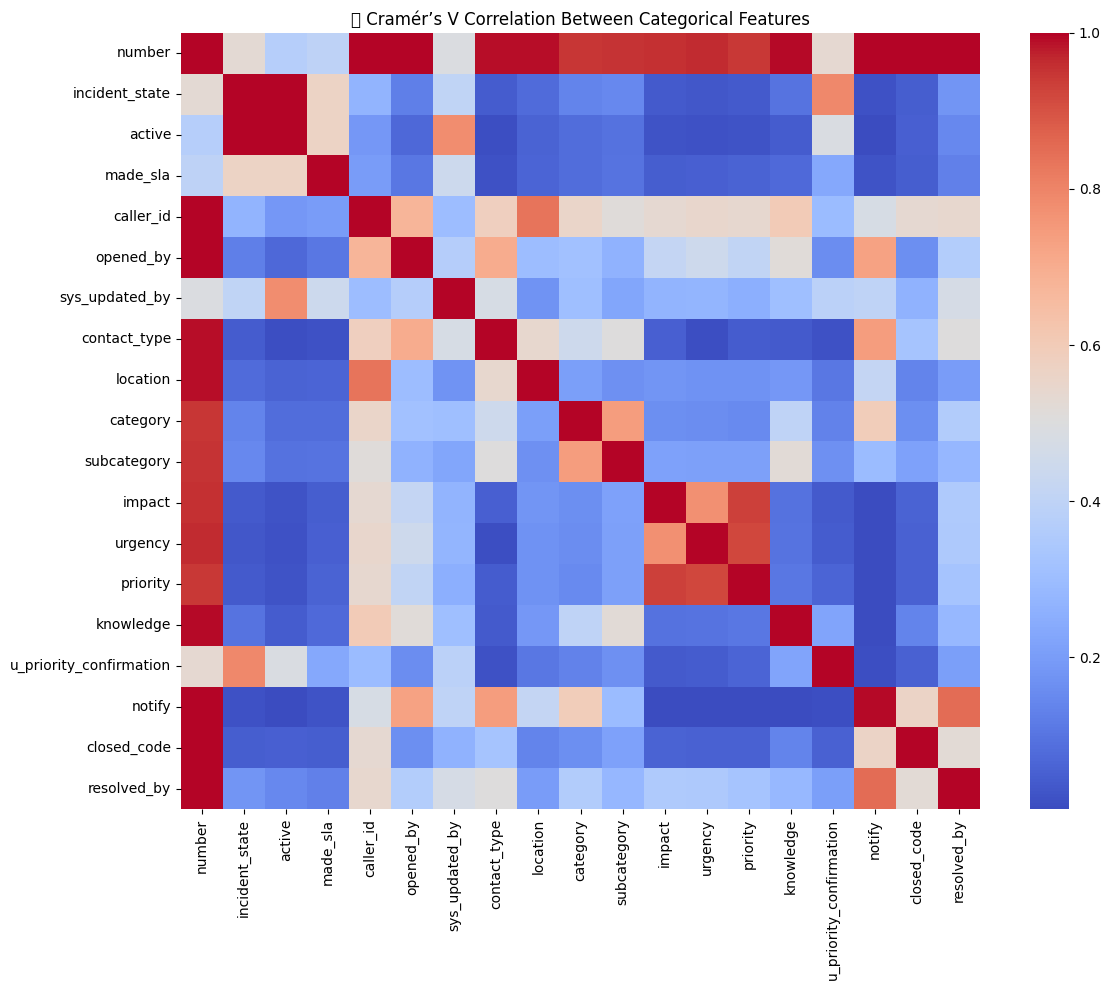

In [28]:
# ----------------------------------
# 3. ✅ Cramér’s V (Strength of Association for Categorical)
# ----------------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k - 1), (r - 1))) if min(k, r) > 1 else np.nan

cramer_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        try:
            cramer_matrix.loc[col1, col2] = cramers_v(df_analysis[col1], df_analysis[col2])
        except:
            cramer_matrix.loc[col1, col2] = np.nan

cramer_matrix = cramer_matrix.astype(float)

# Optional: Visualize Cramér’s V
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix, cmap='coolwarm', annot=False)
plt.title("🔥 Cramér’s V Correlation Between Categorical Features")
plt.tight_layout()
plt.show()

### 📊 ANOVA (Categorical vs Numerical Target)

This code performs **one-way ANOVA tests** between each **categorical feature** and a **numerical target** (`time_to_close_hours`) to see if the mean of the target variable significantly differs across groups.

---

### 💡 What is ANOVA?

**ANOVA (Analysis of Variance)** tests whether there are significant differences in the **mean** of a **numerical variable** across **two or more groups** defined by a **categorical variable**.

- **Null Hypothesis (H₀):** All group means are equal.
- **Alternative Hypothesis (H₁):** At least one group mean is different.

---

### 🧱 Code Summary

- Checks if `time_to_close_hours` exists in the dataset.
- For each categorical column:
  - Groups the target values by the unique categories.
  - Drops missing values and ensures at least 2 groups exist.
  - Applies **`scipy.stats.f_oneway()`** to compute:
    - `F-statistic`: Ratio of between-group to within-group variance.
    - `p-value`: Probability that differences are due to chance.
- Stores results in `anova_results` and converts to a DataFrame (`anova_df`).
- Filters for **significant features** where `p-value < 0.05`.

---


In [29]:
# ----------------------------------
#  ANOVA (Categorical vs Numerical Target)
# ----------------------------------
anova_results = []

# target time_to_close_hours
if "time_to_close_hours" in df_analysis.columns:
    target = df_analysis["time_to_close_hours"]

    for cat in categorical_cols:
        groups = [target[df_analysis[cat] == val].dropna() for val in df_analysis[cat].dropna().unique()]
        if len(groups) > 1:
            f_val, p_val = stats.f_oneway(*groups)
            anova_results.append({
                "Categorical Feature": cat,
                "F-statistic": f_val,
                "p-value": p_val
            })

anova_df = pd.DataFrame(anova_results).sort_values(by="p-value")
significant_anova = anova_df[anova_df["p-value"] < 0.05]


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


### ♻️ Identify Redundant Numerical Attributes (High Correlation)

This code identifies **highly correlated numerical feature pairs** based on the **Pearson correlation matrix** to flag **redundant features**.

---

### 🧠 Why?
Highly correlated features (multicollinearity) may provide duplicate information and can:
- Mislead models (especially linear models)
- Increase complexity without improving performance

---

### 🧱 Code Summary

- Sets a **correlation threshold** (`0.5` by default).
- Iterates over all unique pairs in the Pearson correlation matrix.
- Appends pairs with **absolute correlation > threshold** to `redundant_pairs`.
- Extracts and stores only the **first column** from each redundant pair into `redundant_numerical`.

---

### ✅ Result:
- **`redundant_pairs`**: List of highly correlated numerical feature pairs and their correlation value.
- **`redundant_numerical`**: A list of potentially **redundant features** to consider for **removal or dimensionality reduction**.

> Tip: Review `redundant_pairs` to decide which feature(s) to keep based on domain knowledge or feature importance.


In [30]:
# ----------------------------------
# 5. 🔍 Identify Redundant Attributes
# ----------------------------------
# Highly correlated numerical pairs
redundant_pairs = []
threshold = 0.5
for col1 in pearson_corr.columns:
    for col2 in pearson_corr.columns:
        if col1 != col2 and abs(pearson_corr.loc[col1, col2]) > threshold:
            redundant_pairs.append((col1, col2, pearson_corr.loc[col1, col2]))

# Select only one from highly correlated pairs
redundant_numerical = list(set([p[0] for p in redundant_pairs]))


In [31]:
from IPython.display import display

In [32]:
print(" Pearson Correlation Matrix (Numerical):")
display(pearson_corr)

print("\n Significant Chi-Square Results (p < 0.05):")
display(significant_chi)

print("\n Significant ANOVA Results (p < 0.05):")
display(significant_anova)

print("\n Redundant Numerical Features (Correlation > 0.5):")
display(pd.DataFrame(redundant_numerical, columns=["Redundant Feature"]))


 Pearson Correlation Matrix (Numerical):


,reassignment_count,reopen_count,sys_mod_count,time_to_close_hours,time_to_resolve_hours
reassignment_count,1.000000,0.158635,0.531999,0.159299,0.160727
reopen_count,0.158635,1.000000,0.250988,0.050958,0.053483
sys_mod_count,0.531999,0.250988,1.000000,0.587554,0.598899
time_to_close_hours,0.159299,0.050958,0.587554,1.000000,0.980823
time_to_resolve_hours,0.160727,0.053483,0.598899,0.980823,1.000000



 Significant Chi-Square Results (p < 0.05):


,Feature 1,Feature 2,Chi2 Stat,p-value
0,number,incident_state,2.531433e+05,0.000000e+00
3,number,caller_id,5.938053e+08,0.000000e+00
4,number,opened_by,2.346738e+07,0.000000e+00
5,number,sys_updated_by,2.134553e+07,0.000000e+00
6,number,contact_type,4.454142e+05,0.000000e+00
...,...,...,...,...
166,u_priority_confirmation,closed_code,3.332607e+02,1.476342e-60
167,u_priority_confirmation,resolved_by,4.757914e+03,0.000000e+00
168,notify,closed_code,3.601168e+04,0.000000e+00
169,notify,resolved_by,8.166624e+04,0.000000e+00



 Significant ANOVA Results (p < 0.05):


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Categorical Feature,F-statistic,p-value
0,number,inf,0.000000e+00
1,incident_state,1482.636724,0.000000e+00
5,opened_by,41.919109,0.000000e+00
4,caller_id,7.711450,0.000000e+00
6,sys_updated_by,20.039472,0.000000e+00
10,subcategory,120.630101,0.000000e+00
9,category,388.663111,0.000000e+00
8,location,10.144755,0.000000e+00
14,knowledge,1870.576401,0.000000e+00
17,closed_code,115.271590,0.000000e+00



 Redundant Numerical Features (Correlation > 0.5):


,Redundant Feature
0,sys_mod_count
1,time_to_resolve_hours
2,time_to_close_hours
3,reassignment_count


# 📊 Feature Analysis Summary

## 🔍 Pearson Correlation
- `time_to_close_hours` and `time_to_resolve_hours` have a very high correlation (0.98), indicating redundancy.
- `sys_mod_count` shows moderate correlation (0.59) with the target and other numeric features.
- 🔁 **Action**: Drop `time_to_resolve_hours`; optionally drop `sys_mod_count`.

---

## 📉 Chi-Square Test
- High-cardinality identifiers like `number`, `caller_id`, `opened_by`, and `resolved_by` show statistically significant associations but have low predictive value.
- 🔁 **Action**: Drop these ID-based columns.

---

## 📘 ANOVA (vs `time_to_close_hours`)
- Strong statistical association found with:
  - `incident_state`, `priority`, `urgency`, `impact`
  - `made_sla`, `knowledge`, `category`, `subcategory`
- ✅ **Keep** these features for modeling.

---

## ✅ Final Drop List
- `time_to_resolve_hours`
- `number`, `caller_id`, `opened_by`, `resolved_by`
- `sys_mod_count`

---


In [71]:
# ✅ List of columns to drop
cols_to_drop = [
    'time_to_resolve_hours',
    'number',
    'caller_id',
    'opened_by',
    'resolved_by',
]

In [72]:
# ✅ Drop from training set (in-place)
train_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {cols_to_drop}")
print(f"📐 Updated training set shape: {train_df.shape}")

✅ Dropped columns: ['time_to_resolve_hours', 'number', 'caller_id', 'opened_by', 'resolved_by']
📐 Updated training set shape: (113369, 23)


In [96]:
cols_to_drop = ['resolved_at','closed_at']
# ✅ Drop from training set (in-place)
train_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {cols_to_drop}")
print(f"📐 Updated training set shape: {train_df.shape}")

✅ Dropped columns: ['resolved_at', 'closed_at']
📐 Updated training set shape: (110855, 26)


In [97]:
# ✅ Drop from testing set (in-place)
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {cols_to_drop}")
print(f"📐 Updated training set shape: {test_df.shape}")

✅ Dropped columns: ['resolved_at', 'closed_at']
📐 Updated training set shape: (27716, 26)


In [73]:
# ✅ Drop from testing set (in-place)
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {cols_to_drop}")
print(f"📐 Updated training set shape: {test_df.shape}")

✅ Dropped columns: ['time_to_resolve_hours', 'number', 'caller_id', 'opened_by', 'resolved_by']
📐 Updated training set shape: (28343, 23)


In [74]:
train_df.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'opened_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'notify', 'closed_code', 'resolved_at', 'closed_at',
       'time_to_close_hours'],
      dtype='object')

In [75]:
# 🎯 Select only categorical columns
categorical_cols = train_df.select_dtypes(include=['object', 'bool']).columns

# 🔢 Get number of unique values in each categorical column
cat_unique_counts = train_df[categorical_cols].nunique().sort_values(ascending=False)

# 📊 Create a summary DataFrame
cat_unique_summary = pd.DataFrame({
    "Column": cat_unique_counts.index,
    "Unique Values": cat_unique_counts.values
})

# 👁️ Display the result
from IPython.display import display
display(cat_unique_summary)


,Column,Unique Values
0,sys_updated_by,780
1,subcategory,254
2,location,225
3,category,59
4,closed_code,18
5,incident_state,9
6,contact_type,5
7,priority,4
8,impact,3
9,urgency,3


In [76]:
# ✅ Columns to drop based on your selection
drop_categorical_cols = [
    'sys_updated_by',
    'subcategory',
]

In [77]:
# ✅ Drop from training set (in-place)
train_df.drop(columns=drop_categorical_cols, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {drop_categorical_cols}")
print(f"📐 Updated training set shape: {train_df.shape}")

✅ Dropped columns: ['sys_updated_by', 'subcategory']
📐 Updated training set shape: (113369, 21)


In [78]:
# ✅ Drop from testing set (in-place)
test_df.drop(columns=drop_categorical_cols, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {drop_categorical_cols}")
print(f"📐 Updated training set shape: {test_df.shape}")

✅ Dropped columns: ['sys_updated_by', 'subcategory']
📐 Updated training set shape: (28343, 21)


In [79]:
# ✅ Remaining categorical columns
categorical_cols = [
    'contact_type', 'priority', 'impact', 'urgency',
    'made_sla', 'active', 'knowledge', 'u_priority_confirmation', 'notify'
]

# 🔁 Loop through and show value counts
for col in categorical_cols:
    print(f"\n📊 Value Counts for '{col}':")
    print(df[col].value_counts(dropna=False))



📊 Value Counts for 'contact_type':
contact_type
Phone             140462
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: count, dtype: int64

📊 Value Counts for 'priority':
priority
3 - Moderate    132452
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: count, dtype: int64

📊 Value Counts for 'impact':
impact
2 - Medium    134335
3 - Low         3886
1 - High        3491
Name: count, dtype: int64

📊 Value Counts for 'urgency':
urgency
2 - Medium    134094
1 - High        4020
3 - Low         3598
Name: count, dtype: int64

📊 Value Counts for 'made_sla':
made_sla
True     132497
False      9215
Name: count, dtype: int64

📊 Value Counts for 'active':
active
True     116726
False     24986
Name: count, dtype: int64

📊 Value Counts for 'knowledge':
knowledge
False    116349
True      25363
Name: count, dtype: int64

📊 Value Counts for 'u_priority_confirmation':
u_priority_confirmation
False    100740
True 

In [80]:
distinct_cols = ['contact_type','notify'] # here this value are skewed so we do not need it.

In [81]:
# ✅ Drop from training set (in-place)
train_df.drop(columns=distinct_cols, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {distinct_cols}")
print(f"📐 Updated training set shape: {train_df.shape}")

✅ Dropped columns: ['contact_type', 'notify']
📐 Updated training set shape: (113369, 19)


In [82]:
# ✅ Drop from training set (in-place)
test_df.drop(columns=distinct_cols, inplace=True, errors='ignore')

# 📊 Confirm result
print(f"✅ Dropped columns: {distinct_cols}")
print(f"📐 Updated training set shape: {test_df.shape}")

✅ Dropped columns: ['contact_type', 'notify']
📐 Updated training set shape: (28343, 19)


## Missing Value Handling

In [83]:
# Replace '?' with NaN in both sets
train_df.replace("?", np.nan, inplace=True)
test_df.replace("?", np.nan, inplace=True)

# Function to compute total missing (NaN + '?') summary
def get_missing_summary(df):
    total_rows = len(df)
    nan_counts = df.isnull().sum()
    question_mark_counts = df.apply(lambda col: (col.astype(str).str.strip() == '?').sum())
    total_missing = nan_counts + question_mark_counts
    missing_percent = (total_missing / total_rows) * 100
    return pd.DataFrame({
        "Missing Count": total_missing,
        "Missing %": missing_percent.round(2)
    }).sort_values(by="Missing %", ascending=False)

# Get missing summary for train and test
train_missing_summary = get_missing_summary(train_df)
test_missing_summary = get_missing_summary(test_df)

# Drop rows with missing 'resolved_at'
train_df = train_df[train_df['resolved_at'].notna()]
test_df = test_df[test_df['resolved_at'].notna()]

# Show summaries
from IPython.display import display

print("🔍 Missing Value Summary in `train_df` (NaN + '?'):")
display(train_missing_summary)

print("🔍 Missing Value Summary in `test_df` (NaN + '?'):")
display(test_missing_summary)

print(f"\n✅ Dropped rows with missing 'resolved_at' from both sets.")
print(f"📊 Updated train_df shape: {train_df.shape}")
print(f"📊 Updated test_df shape: {test_df.shape}")

🔍 Missing Value Summary in `train_df` (NaN + '?'):


,Missing Count,Missing %
resolved_at,2514,2.22
closed_code,564,0.50
location,65,0.06
category,60,0.05
reassignment_count,0,0.00
incident_state,0,0.00
active,0,0.00
opened_at,0,0.00
made_sla,0,0.00
reopen_count,0,0.00


🔍 Missing Value Summary in `test_df` (NaN + '?'):


,Missing Count,Missing %
resolved_at,627,2.21
closed_code,150,0.53
category,18,0.06
location,11,0.04
reassignment_count,0,0.00
incident_state,0,0.00
active,0,0.00
opened_at,0,0.00
made_sla,0,0.00
reopen_count,0,0.00



✅ Dropped rows with missing 'resolved_at' from both sets.
📊 Updated train_df shape: (110855, 19)
📊 Updated test_df shape: (27716, 19)


In [84]:
import pandas as pd

# Step 1: Select numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Function to detect outliers using IQR
def detect_all_outliers_iqr(df, numeric_cols):
    summary = []

    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]

        summary.append({
            "Column": col,
            "Lower Bound": round(lower, 2),
            "Upper Bound": round(upper, 2),
            "Total Outliers": len(outliers),
            "Outlier %": round(100 * len(outliers) / len(df), 2)
        })

    return pd.DataFrame(summary).sort_values(by="Outlier %", ascending=False)

# Step 3: Run and display
outlier_summary = detect_all_outliers_iqr(train_df, numeric_cols)

from IPython.display import display
display(outlier_summary)

,Column,Lower Bound,Upper Bound,Total Outliers,Outlier %
2,sys_mod_count,-6.50,13.50,8718,7.86
3,time_to_close_hours,-323.98,877.35,8303,7.49
0,reassignment_count,-3.00,5.00,3326,3.00
1,reopen_count,0.00,0.00,1860,1.68


Outlier no need to do anythings keep as it is

In [85]:
# Step 1: Detect negative values in numeric columns
negative_value_summary = []

for col in train_df.select_dtypes(include=['int64', 'float64']).columns:
    negative_count = (train_df[col] < 0).sum()
    if negative_count > 0:
        negative_value_summary.append({
            "Column": col,
            "Negative Count": negative_count,
            "Total Records": len(train_df),
            "Negative %": round((negative_count / len(train_df)) * 100, 2)
        })

negative_df = (
    pd.DataFrame(negative_value_summary)
    if negative_value_summary
    else pd.DataFrame(columns=["Column", "Negative Count", "Total Records", "Negative %"])
)

# Step 2: Detect suspicious string values in object columns
bad_tokens = ['unknown', 'null', 'n/a', 'na', 'none', '???', '-','?']
suspicious_value_summary = []

for col in train_df.select_dtypes(include=['object']).columns:
    value_counts = train_df[col].str.lower().value_counts()
    for token in bad_tokens:
        if token in value_counts:
            suspicious_value_summary.append({
                "Column": col,
                "Bad Value": token,
                "Count": value_counts[token],
                "Bad %": round((value_counts[token] / len(train_df)) * 100, 2)
            })

suspicious_df = (
    pd.DataFrame(suspicious_value_summary)
    if suspicious_value_summary
    else pd.DataFrame(columns=["Column", "Bad Value", "Count", "Bad %"])
)

# Step 3: Display Results (works in Jupyter/Colab)
from IPython.display import display

print("🔍 Numeric Columns with Negative Values:")
display(negative_df)

print("\n🔍 Categorical Columns with Bad String Values:")
display(suspicious_df)

🔍 Numeric Columns with Negative Values:


,Column,Negative Count,Total Records,Negative %



🔍 Categorical Columns with Bad String Values:


,Column,Bad Value,Count,Bad %


In [49]:
# 🔍 Detect column types
analytics_types = {}
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        analytics_types[col] = 'Numerical'
    elif train_df[col].dtype == 'bool':
        analytics_types[col] = 'Binary'
    elif train_df[col].nunique() <= 10:
        analytics_types[col] = 'Categorical'
    else:
        analytics_types[col] = 'Nominal'

# 🧠 Separate by type
numerical_cols = [col for col, typ in analytics_types.items() if typ == 'Numerical']
binary_cols = [col for col, typ in analytics_types.items() if typ == 'Binary']
categorical_cols = [col for col, typ in analytics_types.items() if typ == 'Categorical']
nominal_cols = [col for col, typ in analytics_types.items() if typ == 'Nominal']



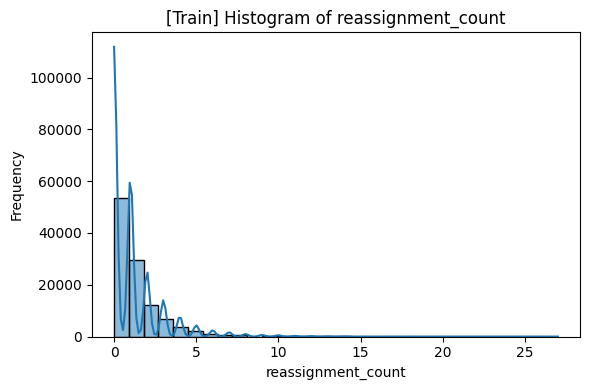

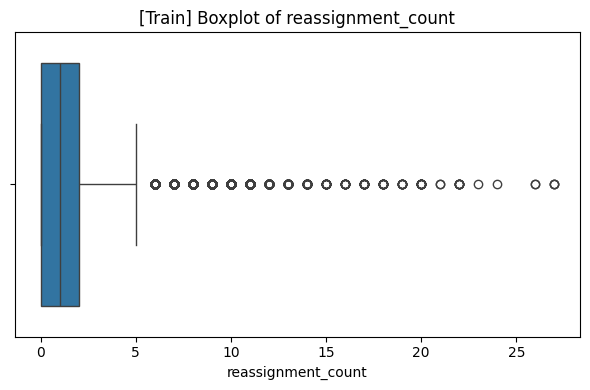

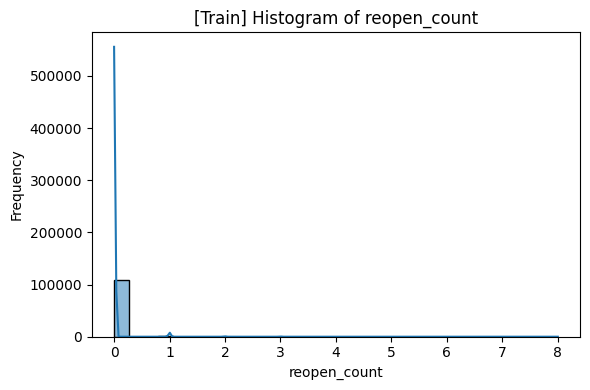

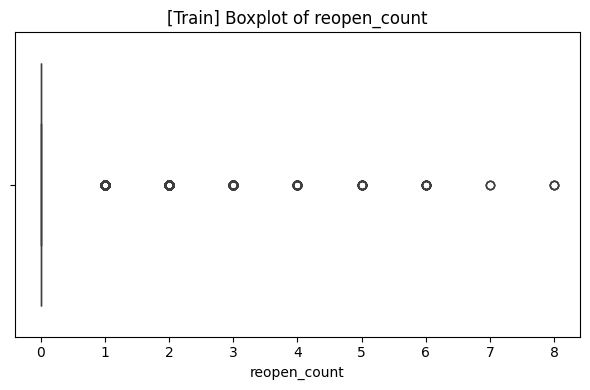

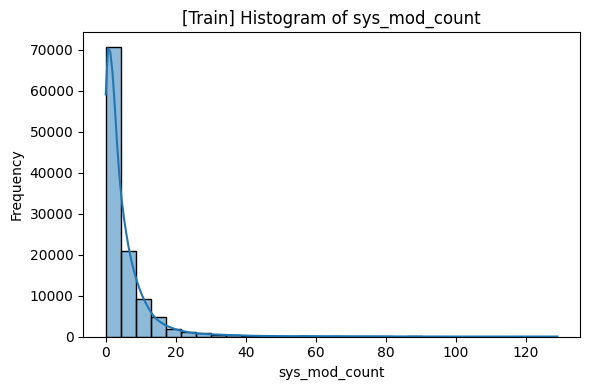

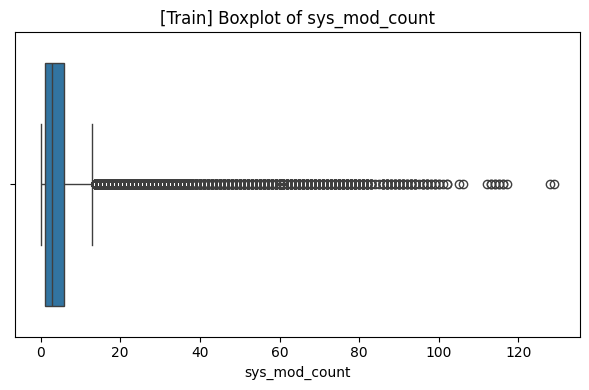

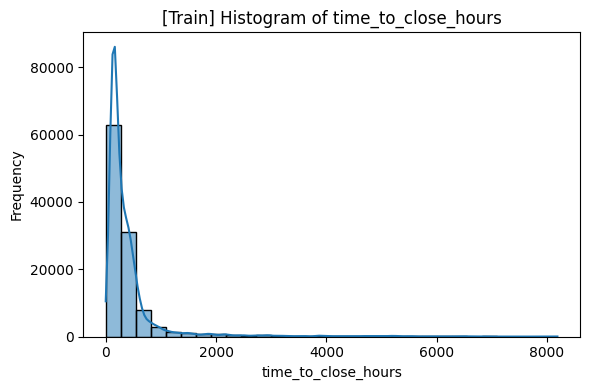

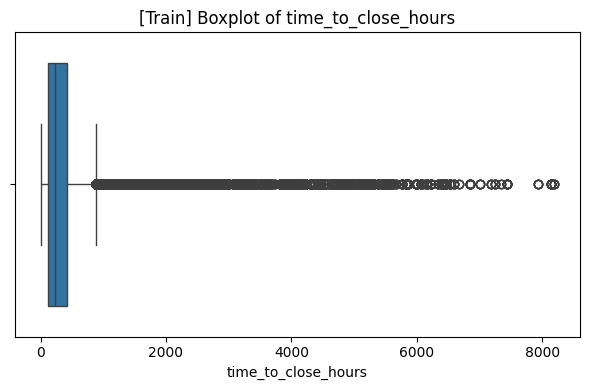

In [50]:
# 📊 Numerical Features: Histogram & Boxplot
for col in numerical_cols:
    if train_df[col].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.histplot(train_df[col].dropna(), kde=True, bins=30)
        plt.title(f"[Train] Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=train_df[col].dropna())
        plt.title(f"[Train] Boxplot of {col}")
        plt.tight_layout()
        plt.show()

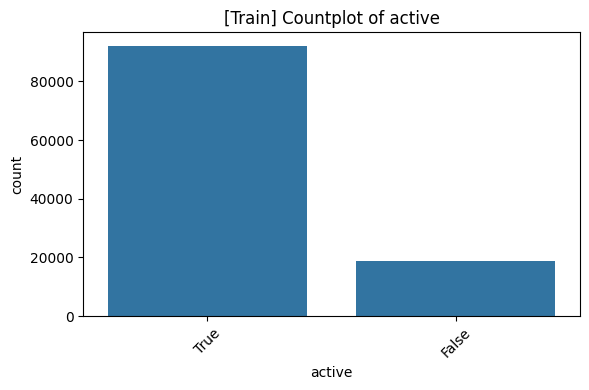

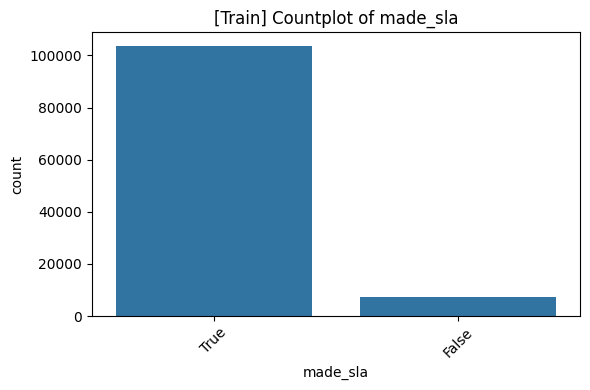

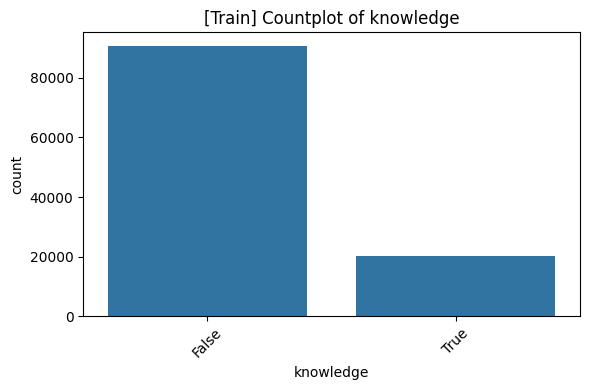

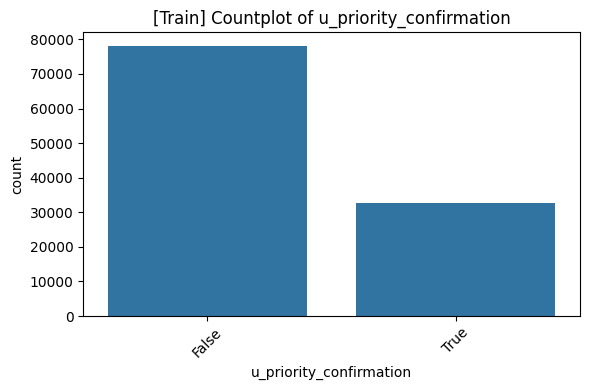

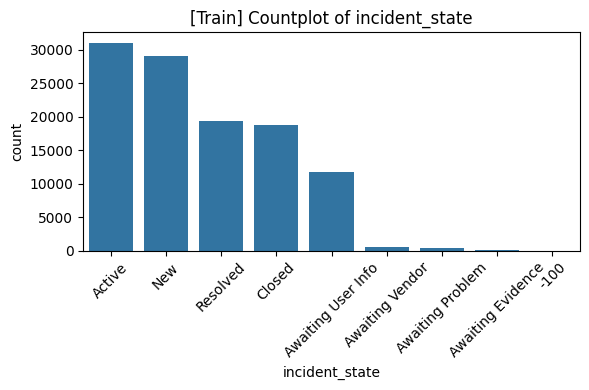

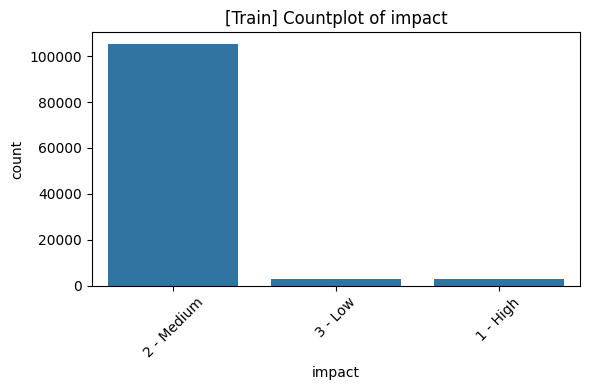

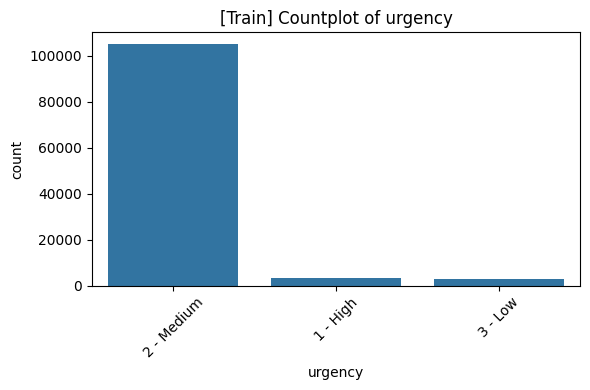

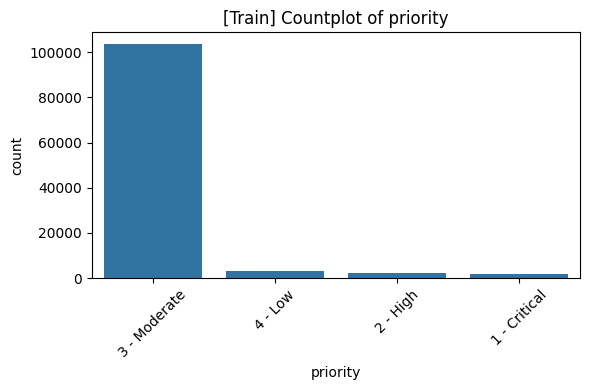

In [51]:
# 📊 Binary & Categorical: Countplot
for col in binary_cols + categorical_cols:
    if train_df[col].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
        plt.title(f"[Train] Countplot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

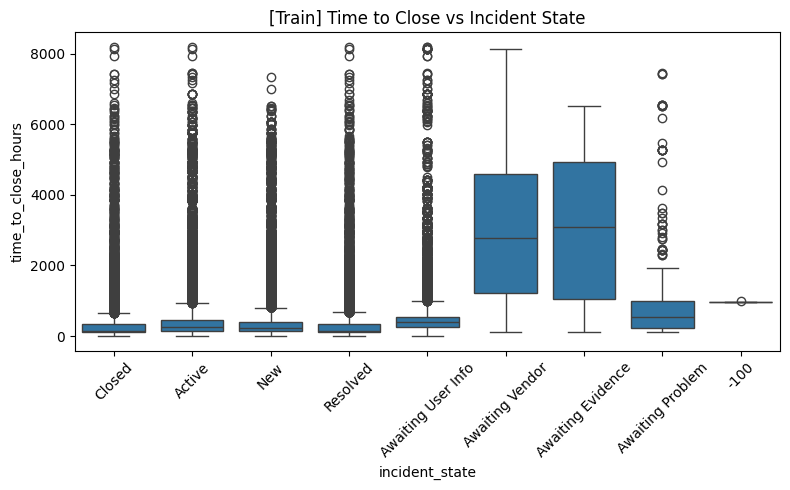

In [52]:
# 🔁 Combination: Boxplot (Numerical vs Categorical)
if 'time_to_close_hours' in train_df.columns and 'incident_state' in train_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x='incident_state', y='time_to_close_hours')
    plt.title("[Train] Time to Close vs Incident State")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Machine learning models

In [98]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
date_col_list = train_df.select_dtypes(include=["datetime64"]).columns
date_col_list

Index(['opened_at', 'sys_updated_at'], dtype='object')

In [100]:
for col in date_col_list:
    for df in [train_df, test_df]:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f"{col}_hour"] = df[col].dt.hour
        df[f"{col}_weekday"] = df[col].dt.weekday
        df[f"{col}_month"] = df[col].dt.month

In [ ]:
# 0️⃣ Drop datetime columns from train and test
train_df = train_df.drop(columns=train_df.select_dtypes(include=["datetime64"]).columns)
test_df = test_df.drop(columns=test_df.select_dtypes(include=["datetime64"]).columns)

In [107]:
train_df.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'location', 'category', 'impact',
       'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'closed_code', 'time_to_close_hours', 'opened_at_hour',
       'opened_at_weekday', 'opened_at_month', 'sys_updated_at_hour',
       'sys_updated_at_weekday', 'sys_updated_at_month'],
      dtype='object')

In [108]:
label_encoders = {}
train_encoded = train_df.copy()

for col in train_encoded.select_dtypes(include=["object", "bool"]).columns:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
    label_encoders[col] = le

# 2️⃣ Encode test_df using the same encoders
test_encoded = test_df.copy()
for col, le in label_encoders.items():
    if col in test_encoded.columns:
        test_encoded[col] = le.transform(test_encoded[col].astype(str))

# 3️⃣ Prepare features and target
X_train = train_encoded.drop(columns=["time_to_close_hours"])
y_train = train_encoded["time_to_close_hours"]
X_test = test_encoded.drop(columns=["time_to_close_hours"])
y_test = test_encoded["time_to_close_hours"]

# 4️⃣ Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 6️⃣ Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 7️⃣ Output results
print("🔍 Linear Regression Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


🔍 Linear Regression Evaluation:
MAE  = 215.96
MSE  = 235966.51
RMSE = 485.76
R²   = 0.48


In [109]:
# 🧾 Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# 📊 Show top 10 comparisons
print("🔍 Top 10 Predicted vs Actual Time to Close (in hours):")
print(comparison_df.head(10).round(2))


🔍 Top 10 Predicted vs Actual Time to Close (in hours):
   Actual  Predicted
0  309.58     165.41
1  122.28     218.92
2  120.55     293.52
3  129.95     323.99
4  174.63     226.50
5  363.20     827.63
6  640.75     319.11
7  120.33     139.07
8  262.00     329.63
9  288.85     266.85


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ✅ Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 🎯 Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# 📈 Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

# 📊 Print results
print("🌲 Random Forest Regressor Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


🌲 Random Forest Regressor Evaluation:
MAE  = 132.44
MSE  = 120355.04
RMSE = 346.92
R²   = 0.74


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 🔍 Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 🌲 Random Forest model
rf = RandomForestRegressor(random_state=42)

# 🔄 Grid search (5-fold CV)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# 🚀 Fit on training data
grid_search.fit(X_train_scaled, y_train)

# 🏆 Best model
best_rf = grid_search.best_estimator_
print("✅ Best Hyperparameters:", grid_search.best_params_)

# 🎯 Predict and evaluate
y_pred_best_rf = best_rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_best_rf)
mse = mean_squared_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_rf)

# 📊 Results
print("\n📈 Tuned Random Forest Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📈 Tuned Random Forest Evaluation:
MAE  = 131.76
MSE  = 119516.18
RMSE = 345.71
R²   = 0.74


In [112]:
from sklearn.ensemble import HistGradientBoostingRegressor

# 🚀 Train Gradient Boosting Regressor
gb_model = HistGradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# 🎯 Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# 📊 Evaluate
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

# 📝 Print results
print("🌟 Gradient Boosting Regressor Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


🌟 Gradient Boosting Regressor Evaluation:
MAE  = 168.95
MSE  = 162388.16
RMSE = 402.97
R²   = 0.64


In [115]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00


In [116]:
from xgboost import XGBRegressor

# 🚀 Define and train XGBoost model
xgb_model = XGBRegressor(n_estimators=50, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 🎯 Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 📊 Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

# 📝 Print results
print("📈 XGBoost Regressor Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


📈 XGBoost Regressor Evaluation:
MAE  = 174.45
MSE  = 178954.50
RMSE = 423.03
R²   = 0.61


In [117]:
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 597.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00


In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [119]:
# 🚀 Define the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# 🧠 Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# 🏋️ Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 🎯 Predict
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# 📊 Evaluate
mae = mean_absolute_error(y_test, y_pred_nn)
mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_nn)

# 📝 Print results
print("📈 Neural Network Regression Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2772/2772 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 332062.9062 - val_loss: 209632.4375
Epoch 2/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 231073.5625 - val_loss: 208252.9062
Epoch 3/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 223320.4219 - val_loss: 208673.7969
Epoch 4/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 222947.8750 - val_loss: 208489.0781
Epoch 5/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 224249.9688 - val_loss: 205795.0469
Epoch 6/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 220250.3281 - val_loss: 204460.3906
Epoch 7/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 224215.5000 - val_loss: 202978.7344
Epoch 8/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 219282.7344 - val_loss: 203088.4688
Epoch 9/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 211116.8125 - val_loss: 200827.5469
Epoch 10/50
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 219042.1719 - val_loss: 200244.8438
Epoch 11/50
2772/2772 ━━━━━━━━

# The best Result we are getting is for
📈 Tuned Random Forest Evaluation:
* MAE  = 131.76
* MSE  = 119516.18
* RMSE = 345.71
* R²   = 0.74
- Which is ok but can we can convert the problem to classification we are defning the lables into
1) Short: 0- 24 hrs
2) Meduim: 24-72 hrs
3) Long: 72+ hrs

In [144]:
num_bins = 5
train_df['closure_class'], bin_edges = pd.qcut(
    train_df['time_to_close_hours'],
    q=num_bins,
    labels=[f'Class {i+1}' for i in range(num_bins)],
    retbins=True,
    duplicates='drop'
)

# Show bin edges
print("📦 Bin edges from qcut:", bin_edges)

📦 Bin edges from qcut: [3.33333333e-02 1.22466667e+02 1.72500000e+02 3.01583333e+02
 4.82436667e+02 8.19061667e+03]


In [145]:
# ✅ Updated manual bin edges and labels
bins = [0, 120, 168, 300, 480, float('inf')]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# 🔁 Apply to both train and test sets
for df in [train_df, test_df]:
    df['closure_class'] = pd.cut(df['time_to_close_hours'], bins=bins, labels=labels, right=False)

In [151]:
train_df['closure_class'].dtype

CategoricalDtype(categories=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], ordered=True, categories_dtype=object)

In [150]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1️⃣ Encode categorical features using LabelEncoder
label_encoders = {}
train_encoded = train_df.copy()

for col in train_encoded.select_dtypes(include=["object", "bool"]).columns:
    le = LabelEncoder()
    print(col)
    train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
    label_encoders[col] = le

# 2️⃣ Encode test_df using the same encoders
test_encoded = test_df.copy()
for col, le in label_encoders.items():
    if col in test_encoded.columns:
        test_encoded[col] = le.transform(test_encoded[col].astype(str))

# 3️⃣ Prepare features and target
X_train_cls = train_encoded.drop(columns=["time_to_close_hours", "closure_class"], errors="ignore")
y_train_cls = train_encoded["closure_class"]
X_test_cls = test_encoded.drop(columns=["time_to_close_hours", "closure_class"], errors="ignore")
y_test_cls = test_encoded["closure_class"]

# 4️⃣ Standardize numeric features
scaler = StandardScaler()
X_train_scaled_cls = scaler.fit_transform(X_train_cls)
X_test_scaled_cls = scaler.transform(X_test_cls)

# 5️⃣ Train Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled_cls, y_train_cls)

# 6️⃣ Predict and Evaluate
y_pred_cls = clf.predict(X_test_scaled_cls)

incident_state
active
made_sla
location
category
impact
urgency
priority
knowledge
u_priority_confirmation
closed_code


In [153]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("📈 Classification Report:")
print(classification_report(y_test_cls, y_pred_cls, target_names=labels))

print("✅ Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))


📈 Classification Report:
              precision    recall  f1-score   support

  Very Short       0.76      0.71      0.73      5361
       Short       0.70      0.72      0.71      6128
      Medium       0.81      0.89      0.84     10479
        Long       0.85      0.74      0.79      5615
   Very Long       0.74      0.22      0.34       133

    accuracy                           0.78     27716
   macro avg       0.77      0.65      0.68     27716
weighted avg       0.78      0.78      0.78     27716

✅ Accuracy: 0.7816784528792033
🧩 Confusion Matrix:
[[3803  667  507  384    0]
 [ 425 4384 1165  154    0]
 [ 250  739 9300  182    8]
 [ 503  472  489 4149    2]
 [   8   17   76    3   29]]


In [169]:
from sklearn.linear_model import LogisticRegression

# 🧠 Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)

# 🚀 Train the model
log_reg.fit(X_train_scaled_cls, y_train_cls)

# 🎯 Predict on test set
y_pred_logreg = log_reg.predict(X_test_scaled_cls)


print("📈 Logistic Regression Classification Report:")
print(classification_report(y_test_cls, y_pred_logreg, target_names=labels))

print("✅ Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_logreg))


📈 Logistic Regression Classification Report:
              precision    recall  f1-score   support

  Very Short       0.48      0.37      0.42      5361
       Short       0.41      0.46      0.44      6128
      Medium       0.76      0.62      0.68     10479
        Long       0.63      0.54      0.58      5615
   Very Long       0.01      0.35      0.03       133

    accuracy                           0.52     27716
   macro avg       0.46      0.47      0.43     27716
weighted avg       0.60      0.52      0.55     27716

✅ Accuracy: 0.5192668494732284
🧩 Confusion Matrix:
[[1970 1389  387 1115  500]
 [ 600 2844 1194  443 1047]
 [ 451 1822 6497  246 1463]
 [1052  807  406 3034  316]
 [   4   37   44    1   47]]


In [160]:
from sklearn.preprocessing import LabelEncoder

# Encode closure_class for model training
le_closure = LabelEncoder()
train_encoded['closure_class'] = le_closure.fit_transform(train_df['closure_class'].astype(str))
test_encoded['closure_class'] = le_closure.transform(test_df['closure_class'].astype(str))
label_encoders['closure_class'] = le_closure  # store it
X_train_cls = train_encoded.drop(columns=["time_to_close_hours"])
y_train_cls = train_encoded["closure_class"]

X_test_cls = test_encoded.drop(columns=["time_to_close_hours"])
y_test_cls = test_encoded["closure_class"]


In [162]:
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

In [164]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 🧠 Initialize XGBoost model
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# 🚀 Train
xgb_clf.fit(X_train_scaled_cls, y_train_cls)

# 🎯 Predict
y_pred_xgb = xgb_clf.predict(X_test_scaled_cls)


print("📈 XGBoost Classification Report:")
print(classification_report(y_test_cls, y_pred_xgb, target_names=labels))

print("✅ Accuracy:", accuracy_score(y_test_cls, y_pred_xgb))
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:29:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📈 XGBoost Classification Report:
              precision    recall  f1-score   support

  Very Short       0.71      0.60      0.65      5361
       Short       0.63      0.67      0.65      6128
      Medium       0.77      0.87      0.82     10479
        Long       0.81      0.68      0.74      5615
   Very Long       0.96      0.35      0.52       133

    accuracy                           0.74     27716
   macro avg       0.78      0.64      0.68     27716
weighted avg       0.74      0.74      0.73     27716

✅ Accuracy: 0.7356039832587675
🧩 Confusion Matrix:
[[3236  964  637  524    0]
 [ 425 4116 1403  184    0]
 [ 280  825 9166  206    2]
 [ 626  594  572 3823    0]
 [   2   22   60    2   47]]


### 🔍 Model Performance: Classification (Target = `closure_class`)

| Model                  | Accuracy | Macro Avg F1 | Weighted Avg F1 | Precision (Macro) | Recall (Macro) |
|------------------------|----------|--------------|------------------|--------------------|----------------|
| 🎯 Random Forest       | 0.782    | 0.68         | 0.78             | 0.77               | 0.65           |
| 📉 Logistic Regression | 0.519    | 0.43         | 0.55             | 0.46               | 0.47           |
| ⚡ XGBoost Classifier   | 0.736    | 0.68         | 0.73             | 0.78               | 0.64           |

### 🔢 Class-Wise Performance (Random Forest Example)
| Class        | Precision | Recall | F1-Score |
|--------------|-----------|--------|----------|
| Very Short   | 0.76      | 0.71   | 0.73     |
| Short        | 0.70      | 0.72   | 0.71     |
| Medium       | 0.81      | 0.89   | 0.84     |
| Long         | 0.85      | 0.74   | 0.79     |
| Very Long    | 0.74      | 0.22   | 0.34     |

🔍 Classification Insights:
* Random Forest performed the best, achieving 78% accuracy with strong F1-scores across all major classes. However, it struggled on minority class Very Long due to class imbalance.
* Logistic Regression performed poorly with 52% accuracy and a macro F1 of 0.43, showing its limitations with non-linear and imbalanced multi-class problems.
* XGBoost classifier offers a solid trade-off, outperforming logistic regression significantly and coming close to Random Forest, but still underperforming on the minority class.

### 🔍 Model Performance: Regression (Target = `time_to_close_hours`)

| Model                  |   MAE   |     MSE    |   RMSE  |   R²   |
|------------------------|---------|------------|---------|--------|
| Linear Regression      | 215.96  | 235,966.51 | 485.76  | 0.48   |
| Random Forest          | 132.44  | 120,355.04 | 346.92  | 0.74   |
| Tuned Random Forest    | 131.76  | 119,516.18 | 345.71  | 0.74   |
| Gradient Boosting      | 168.95  | 162,388.16 | 402.97  | 0.64   |
| XGBoost Regressor      | 174.45  | 178,954.50 | 423.03  | 0.61   |
| Neural Network         | 189.34  | 200,430.39 | 447.69  | 0.56   |


Regression Insights:
* Tuned Random Forest is the top performer, with lowest MAE and RMSE, and highest R² = 0.74, indicating strong prediction capability.

* Neural Network underperformed compared to tree-based models, likely due to insufficient tuning or the need for more epochs/data normalization.

* Linear regression has the weakest R² (0.48), confirming that a linear model cannot capture the complexity of the time_to_close_hours target.